## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [2]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 
    

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
tf.__version__

'2.4.0'

In [5]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [6]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]


In [8]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




58892288/58889256 [==============================] - 1s 0us/step


In [9]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [11]:
  # useful for getting number of output classes
folders = glob("/content/gdrive/My Drive/dataset/training_set/*")
folders

['/content/gdrive/My Drive/dataset/training_set/cats',
 '/content/gdrive/My Drive/dataset/training_set/dogs']

In [12]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [13]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [14]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [15]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [16]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory("/content/gdrive/My Drive/dataset/training_set/",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 8006 images belonging to 2 classes.


In [18]:
test_set = test_datagen.flow_from_directory("/content/gdrive/My Drive/dataset/test_set/",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2023 images belonging to 2 classes.


In [20]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
251/251 [==============================] - 556s 2s/step - loss: 0.2076 - accuracy: 0.9162 - val_loss: 0.1745 - val_accuracy: 0.9303
Epoch 2/20
251/251 [==============================] - 126s 503ms/step - loss: 0.1861 - accuracy: 0.9228 - val_loss: 0.1882 - val_accuracy: 0.9303
Epoch 3/20
251/251 [==============================] - 126s 502ms/step - loss: 0.1897 - accuracy: 0.9246 - val_loss: 0.2404 - val_accuracy: 0.9179
Epoch 4/20
251/251 [==============================] - 126s 501ms/step - loss: 0.1423 - accuracy: 0.9432 - val_loss: 0.2327 - val_accuracy: 0.9204
Epoch 5/20
251/251 [==============================] - 127s 504ms/step - loss: 0.1525 - accuracy: 0.9424 - val_loss: 0.2410 - val_accuracy: 0.9219
Epoch 6/20
251/251 [==============================] - 128s 511ms/step - loss: 0.1395 - accuracy: 0.9457 - val_loss: 0.2008 - val_accuracy: 0.9352
Epoch 7/20
251/251 [==============================] - 129s 514ms/step - loss: 0.1281 - accuracy: 0.9493 - val_loss: 0.5223 - va

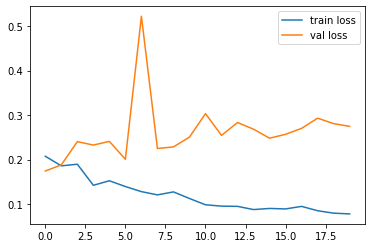

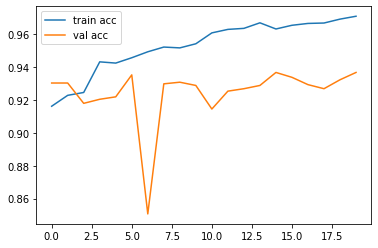

<Figure size 432x288 with 0 Axes>

In [21]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [23]:

y_pred = model.predict(test_set)


In [24]:
y_pred

array([[2.4177230e-06, 9.9999762e-01],
       [1.2394161e-10, 1.0000000e+00],
       [2.5241240e-03, 9.9747592e-01],
       ...,
       [1.3409354e-02, 9.8659062e-01],
       [1.0000000e+00, 2.8834798e-08],
       [2.7569598e-01, 7.2430402e-01]], dtype=float32)

In [25]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [26]:
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [27]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [29]:
model=load_model('model_vgg16.h5')

In [32]:
img=image.load_img('/content/gdrive/My Drive/dataset/test_set/cats/cat.4019.jpg',target_size=(224,224))



In [33]:
x=image.img_to_array(img)
x

array([[[207., 178., 138.],
        [208., 179., 139.],
        [206., 177., 137.],
        ...,
        [208., 177., 133.],
        [205., 174., 130.],
        [206., 173., 130.]],

       [[211., 182., 142.],
        [212., 183., 143.],
        [210., 181., 141.],
        ...,
        [207., 176., 132.],
        [205., 174., 130.],
        [206., 173., 130.]],

       [[211., 182., 142.],
        [212., 183., 143.],
        [210., 181., 141.],
        ...,
        [207., 176., 132.],
        [205., 174., 130.],
        [206., 173., 130.]],

       ...,

       [[190., 120., 131.],
        [204., 134., 145.],
        [191., 121., 132.],
        ...,
        [216., 183., 132.],
        [214., 181., 130.],
        [211., 179., 130.]],

       [[190., 118., 130.],
        [199., 127., 139.],
        [189., 117., 129.],
        ...,
        [213., 181., 130.],
        [211., 179., 128.],
        [209., 177., 128.]],

       [[187., 115., 127.],
        [177., 105., 117.],
        [185., 1

In [34]:
x.shape

(224, 224, 3)

In [35]:
x=x/255

In [36]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [37]:
model.predict(img_data)

array([[0.99805105, 0.00194892]], dtype=float32)

In [38]:
a=np.argmax(model.predict(img_data), axis=1)

In [39]:
a==1

array([False])